In [15]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [16]:
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str

In [17]:
def step_1(state: CrashState) -> CrashState:
    
    print("step 1 executed")
    return {'step1': 'done', 'input':state['input']}

def step_2(state: CrashState) -> CrashState:
    print("step 2 hanging ..... now manually intrrupt from notebook toolbar (stop button)")
    time.sleep(60)
    return {"step2": "Done"}   

def step_3(state: CrashState) -> CrashState:
    
    print("step 3 executed")
    return {'step3': 'done'}


In [18]:
builder = StateGraph(CrashState)

builder.add_node('step_1', step_1)
builder.add_node('step_2', step_2)
builder.add_node('step_3', step_3)

builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()

graph = builder.compile(checkpointer=checkpointer)

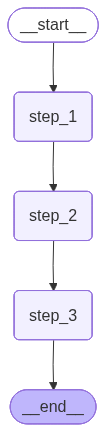

In [19]:
graph

In [20]:
try:
    print("Running graph : please manually interrupt during step 2...")
    graph.invoke({"input": "start"}, config= {"configurable": {"thread_id": "thread-1"}})
    
except KeyboardInterrupt:
    print("Kernel manually interrupted (crash simulated)")

Running graph : please manually interrupt during step 2...
step 1 executed
step 2 hanging ..... now manually intrrupt from notebook toolbar (stop button)
Kernel manually interrupted (crash simulated)


In [21]:
graph.get_state({"configurable": {"thread_id": "thread-1"}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab47-0218-6faf-8001-d64a90d987fe'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-09-26T08:40:21.452357+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab47-0215-6bb5-8000-a35648c1a640'}}, tasks=(PregelTask(id='00cd5790-ce81-2808-b172-0ec70fc8d99f', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [23]:
list(graph.get_state_history({"configurable": {"thread_id": "thread-1"}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab47-0218-6faf-8001-d64a90d987fe'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-09-26T08:40:21.452357+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab47-0215-6bb5-8000-a35648c1a640'}}, tasks=(PregelTask(id='00cd5790-ce81-2808-b172-0ec70fc8d99f', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab47-0215-6bb5-8000-a35648c1a640'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-26T08:40:21.451022+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'ch

In [24]:
final_state = graph.invoke(None, config = {"configurable": {"thread_id": "thread-1"}})
print("\n Final State: ", final_state)


step 2 hanging ..... now manually intrrupt from notebook toolbar (stop button)
step 3 executed

 Final State:  {'input': 'start', 'step1': 'done', 'step2': 'Done', 'step3': 'done'}


In [25]:
graph.get_state({"configurable": {"thread_id": "thread-1"}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'Done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab52-7050-6a07-8003-80fa915a716d'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-09-26T08:45:28.288457+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab52-7049-66b2-8002-f6e8acb0b75c'}}, tasks=(), interrupts=())

In [26]:
list(graph.get_state_history({"configurable": {"thread_id": "thread-1"}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'Done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab52-7050-6a07-8003-80fa915a716d'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-09-26T08:45:28.288457+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab52-7049-66b2-8002-f6e8acb0b75c'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'Done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab52-7049-66b2-8002-f6e8acb0b75c'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-26T08:45:28.285483+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f09ab47-0218-6faf-8001-d64a90d987fe'}}, tasks=(PregelTask(id='55d0feeb-da70-d862